In [1]:
import os
import numpy as np
from uncertainty_motion_prediction.dataloader import Dataloader

dataset=Dataloader();
traj_dataset = dataset.load(0)

# Get trajectories from the dataset

## As a list of Pandas dataframes

In [2]:
trajlets = traj_dataset.get_trajlets(length=4.8)
len(trajlets)

768

In [3]:
trajlets[0]

,frame_id,agent_id,pos_x,pos_y,vel_x,vel_y,scene_id,label,timestamp
5,804,2,13.017548,5.782591,-2.324444,-0.076606,0,pedestrian,53.6
7,810,2,12.087770,5.751949,-1.589052,-0.065971,0,pedestrian,54.0
9,816,2,11.746306,5.729815,-1.140766,0.105373,0,pedestrian,54.4
10,822,2,11.175158,5.836247,-1.640021,0.179235,0,pedestrian,54.8
11,828,2,10.434290,5.873203,-1.406129,0.419050,0,pedestrian,55.2
13,834,2,10.050254,6.171487,-1.078742,0.455190,0,pedestrian,55.6
15,840,2,9.571296,6.237355,-1.207725,0.115437,0,pedestrian,56.0
19,846,2,9.084074,6.263836,-1.273181,0.170841,0,pedestrian,56.4
24,852,2,8.552751,6.374027,-1.232733,0.271502,0,pedestrian,56.8
29,858,2,8.097887,6.481037,-1.146730,0.217892,0,pedestrian,57.2


## As numpy array

In [4]:
trajlets = traj_dataset.get_trajlets(length=4.8, to_numpy=True)
trajlets[0, :, :]

array([[13.017548  ,  5.7825914 , -2.3244442 , -0.07660594, 53.6       ],
       [12.08777   ,  5.751949  , -1.5890517 , -0.06597106, 54.        ],
       [11.746306  ,  5.7298146 , -1.1407656 ,  0.10537256, 54.4       ],
       [11.175158  ,  5.8362471 , -1.6400209 ,  0.17923528, 54.8       ],
       [10.43429   ,  5.8732028 , -1.4061292 ,  0.41904965, 55.2       ],
       [10.050254  ,  6.1714868 , -1.0787423 ,  0.45518986, 55.6       ],
       [ 9.5712958 ,  6.2373547 , -1.207725  ,  0.11543663, 56.        ],
       [ 9.0840742 ,  6.2638361 , -1.2731811 ,  0.17084078, 56.4       ],
       [ 8.5527509 ,  6.3740273 , -1.2327335 ,  0.2715015 , 56.8       ],
       [ 8.0978874 ,  6.4810373 , -1.1467297 ,  0.21789191, 57.2       ],
       [ 7.6353672 ,  6.5483408 , -1.1634956 ,  0.16930578, 57.6       ],
       [ 7.1670909 ,  6.616482  , -1.1264929 ,  0.11639996, 58.        ]])

# Evaluate ADE and FDE

Constant velocity predictor requires no training, hence there is no need to split the trajectories into train and validation sets.

In [5]:
from uncertainty_motion_prediction.evaluators import DistanceErrorEvaluator
from uncertainty_motion_prediction.predictor import ConstantVelocityPredictor

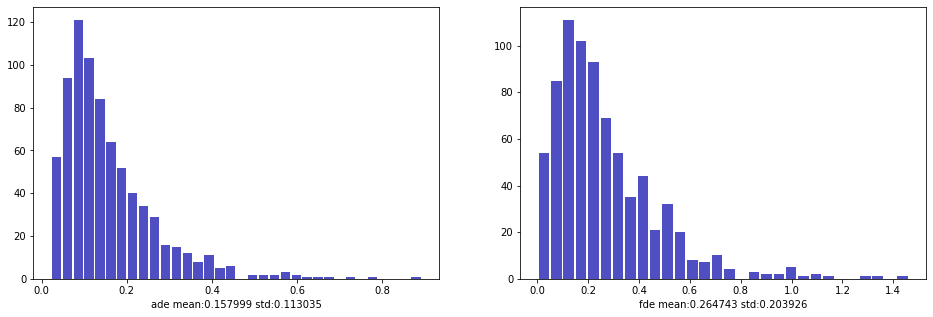

In [6]:
pred = ConstantVelocityPredictor(N_future=4, dt=0.4)
evaluator = DistanceErrorEvaluator(N_future=4)
evaluator.evaluate(pred, trajlets)
evaluator.hist()